# False Positive Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from model import *
import shap

False positive model score:  0.8853073463268366
False negative model score:  0.9044230500906935


/Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import model
falpos_model = lgb.Booster(model_file='falpos.pkl')

# read dataset
data = pd.read_csv("positive.csv", na_values=['NULL'])
data['AcquisitionDateTime_DT'] = pd.to_datetime(data['AcquisitionDateTime_DT'])

drop_cols =  ['PatientID', 
                '12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL']  
X = data.drop(drop_cols, axis=1)
y = data['MI_Phys'] 

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

In [3]:
# explain model with SHAP
explainer = shap.Explainer(falpos_model, X100)
shap_values = explainer(X)
sample_idx = 20

100%|===================| 6651/6667 [01:49<00:00]        

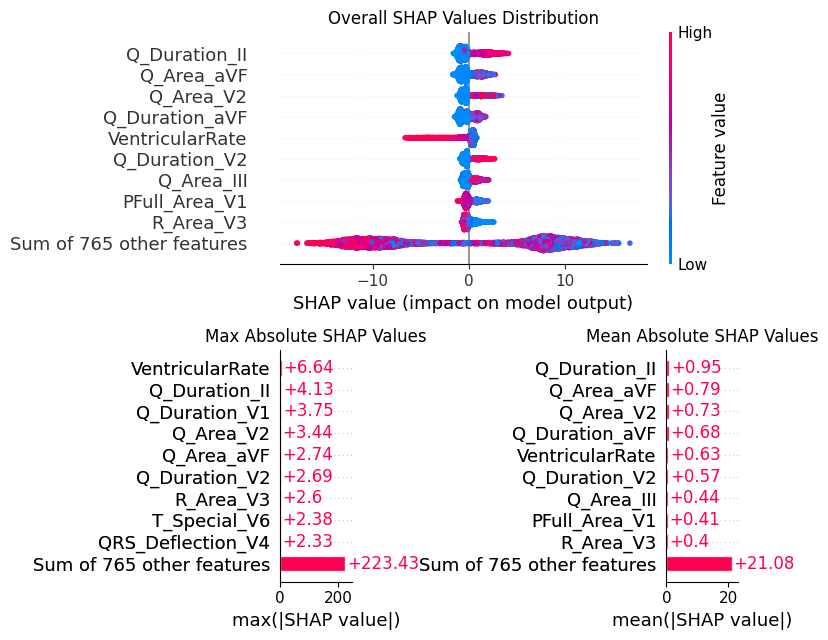

In [ ]:
### SHAP values composite plots
fig = plt.figure()
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1]) 

# subplot axes
ax1 = fig.add_subplot(gs[0, :])  
ax2 = fig.add_subplot(gs[1, 0])  
ax3 = fig.add_subplot(gs[1, 1])  

# plot 1 - show distribution of SHAP values for each feature
plt.sca(ax1) 
shap.plots.beeswarm(shap_values, show=False)
ax1.set_title("Overall SHAP Values Distribution")

# plot 2 - feature importance ranking using max absolute value
plt.sca(ax2)
shap.plots.bar(shap_values.abs.max(0), show=False)
ax2.set_title("Max Absolute SHAP Values")

# plot 3 - feature importance ranking using mean absolute value
plt.sca(ax3)
shap.plots.bar(shap_values, show=False)
ax3.set_title("Mean Absolute SHAP Values")

plt.tight_layout()
plt.show()

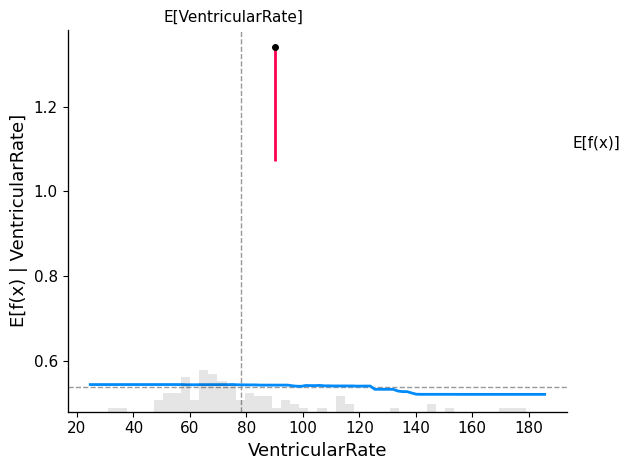

In [ ]:
# standard partial dependence plot for Q_Duration_II and Ventricular Rate
fig, ax = shap.partial_dependence_plot(
    "Q_Duration_II",
    falpos_model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[sample_idx : sample_idx + 1, :],
)

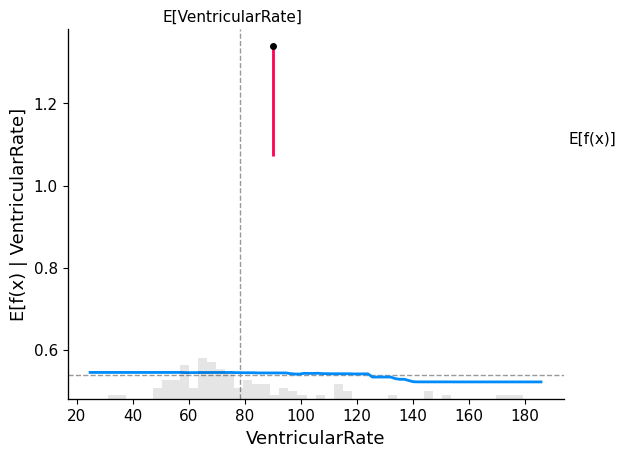

In [ ]:
fig, ax = shap.partial_dependence_plot(
    "VentricularRate",
    falpos_model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[sample_idx : sample_idx + 1, :],
)

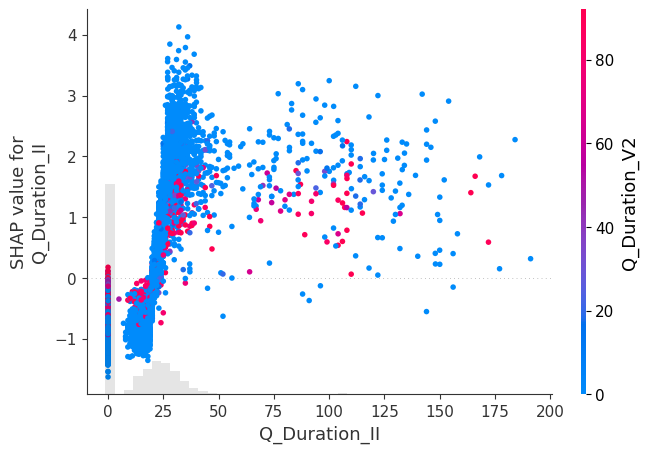

In [20]:
shap.plots.scatter(shap_values[:, "Q_Duration_II"], color=shap_values)

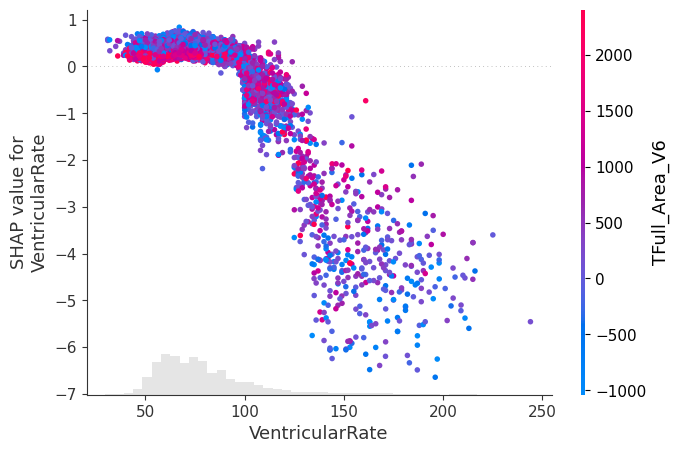

In [21]:
shap.plots.scatter(shap_values[:, "VentricularRate"], color=shap_values)

  2%|▏         | 13136/599076 [00:43<42:49, 228.00it/s]/Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 17 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(
  3%|▎         | 17787/599076 [00:56<31:33, 306.98it/s] /Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 23 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(
  3%|▎         | 19290/599076 [00:58<17:40, 546.71it/s] /Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 25 (this is typically caused by constant or near-consta

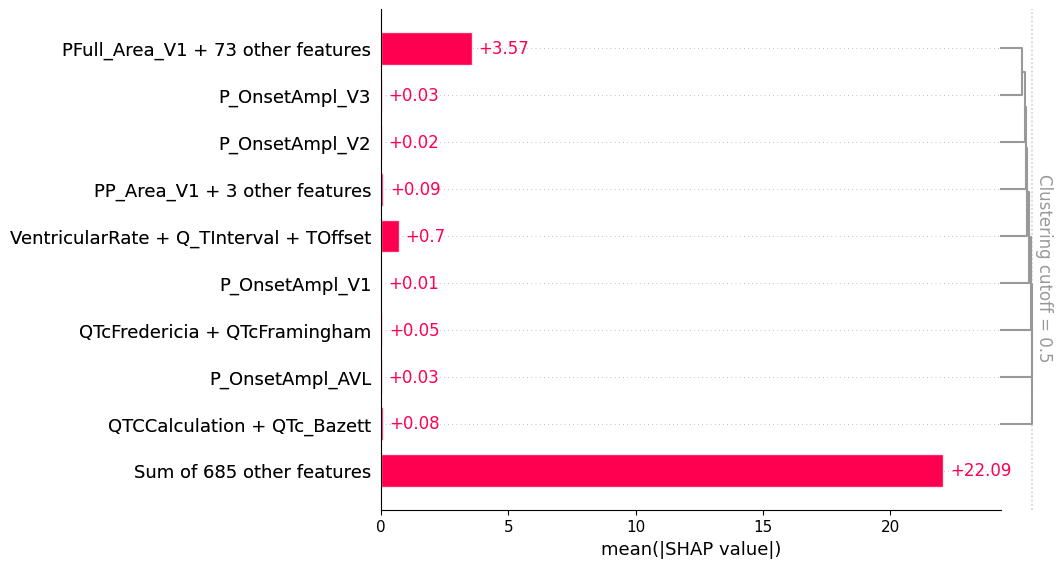

In [25]:
# investigate correlated features
clustering = shap.utils.hclust(X, y)
shap.plots.bar(shap_values, clustering=clustering)

# False Negative Model

In [ ]:
# import model
falneg_model = lgb.Booster(model_file='falneg.pkl')

# read dataset
data = pd.read_csv("negative.csv", na_values=['NULL'])
data['AcquisitionDateTime_DT'] = pd.to_datetime(data['AcquisitionDateTime_DT'])

drop_cols =  ['PatientID', 
                '12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL']  
X = data.drop(drop_cols, axis=1)
y = data['MI_Phys'] 
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

In [ ]:
# explain model with SHAP
explainer = shap.Explainer(falpos_model, X100)
shap_values = explainer(X)
sample_idx = 20

In [ ]:
### SHAP values composite plots
fig = plt.figure()
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1]) 

# subplot axes
ax1 = fig.add_subplot(gs[0, :])  
ax2 = fig.add_subplot(gs[1, 0])  
ax3 = fig.add_subplot(gs[1, 1])  

# plot 1 - show distribution of SHAP values for each feature
plt.sca(ax1) 
shap.plots.beeswarm(shap_values, show=False)
ax1.set_title("Overall SHAP Values Distribution")

# plot 2 - feature importance ranking using max absolute value
plt.sca(ax2)
shap.plots.bar(shap_values.abs.max(0), show=False)
ax2.set_title("Max Absolute SHAP Values")

# plot 3 - feature importance ranking using mean absolute value
plt.sca(ax3)
shap.plots.bar(shap_values, show=False)
ax3.set_title("Mean Absolute SHAP Values")

plt.tight_layout()
plt.show()

# Local Interpretable Model-agnostic Explanations (LIME)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from model import *

False positive model score:  0.8853073463268366
False negative model score:  0.9044230500906935


In [ ]:
# get files
falneg_files = [f for f in os.listdir("false_patients/") if f.startswith("false_negative")]

# get patient ID and code case
falneg = []
for f in falneg_files:
    df = pd.read_csv(os.path.join(f"false_patients/{f}"), skiprows=1)
    df["Code"] = f.split("_")[2].split(".")[0]
    falneg.append(df)

falneg = pd.concat(falneg, ignore_index=True)

In [ ]:
falneg

,PatientID,Source,Code
0,HR00039,PTBXL,39732003
1,HR00050,PTBXL,39732003
2,HR00155,PTBXL,39732003
3,HR00210,PTBXL,39732003
4,HR00274,PTBXL,39732003
...,...,...,...
95,HR00413,PTBXL,164884008
96,HR00452,PTBXL,164884008
97,HR00713,PTBXL,164884008
98,HR00738,PTBXL,164884008


In [ ]:
# apply lime
from lime.lime_tabular import LimeTabularExplainer

data = pd.read_csv("negative.csv", na_values=['NULL'])
data['AcquisitionDateTime_DT'] = pd.to_datetime(data['AcquisitionDateTime_DT'])

drop_cols =  ['12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL']  
X_withID = data.drop(drop_cols, axis=1)
y = data['MI_Phys'] 

In [ ]:
X = X_withID.drop("PatientID")

# Get the class names
class_names = y.unique()

# Get the feature names
feature_names = list(X.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X.values, 
                                 feature_names = feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

KeyError: "['PatientID'] not found in axis"

In [ ]:
import numpy as np

# LIME expects predict_proba-style output: shape (n_samples, n_classes)
def predict_proba_for_lime(X_batch):
    # Returns probability of class 1 (positive)
    prob_pos = falneg_model.predict(X_batch)
    
    # Get probability of class 0 (negative)
    prob_neg = 1 - prob_pos
    
    # Stack to match sklearn's predict_proba output: [P(neg), P(pos)]
    return np.vstack((prob_neg, prob_pos)).T

In [ ]:
# model
falneg_model = lgb.Booster(model_file='falneg.pkl')
exp = explainer.explain_instance(X, predict_proba_for_lime)
exp.show_in_notebook() 

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# false positives
falpos = [f for f in os.listdir("false_patients/") if f.startswith("false_positive")]

### Visualize decision tree in LGB

In [ ]:
import graphviz

In [ ]:
# get training set
data = pd.read_csv("positive.csv", na_values=['NULL'])
data['AcquisitionDateTime_DT'] = pd.to_datetime(data['AcquisitionDateTime_DT'])

drop_cols =  ['PatientID', 
                '12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL']  
X = data.drop(drop_cols, axis=1)
y = data['MI_Phys'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# drop columns with NA value
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index] 

<Figure size 3000x2000 with 0 Axes>

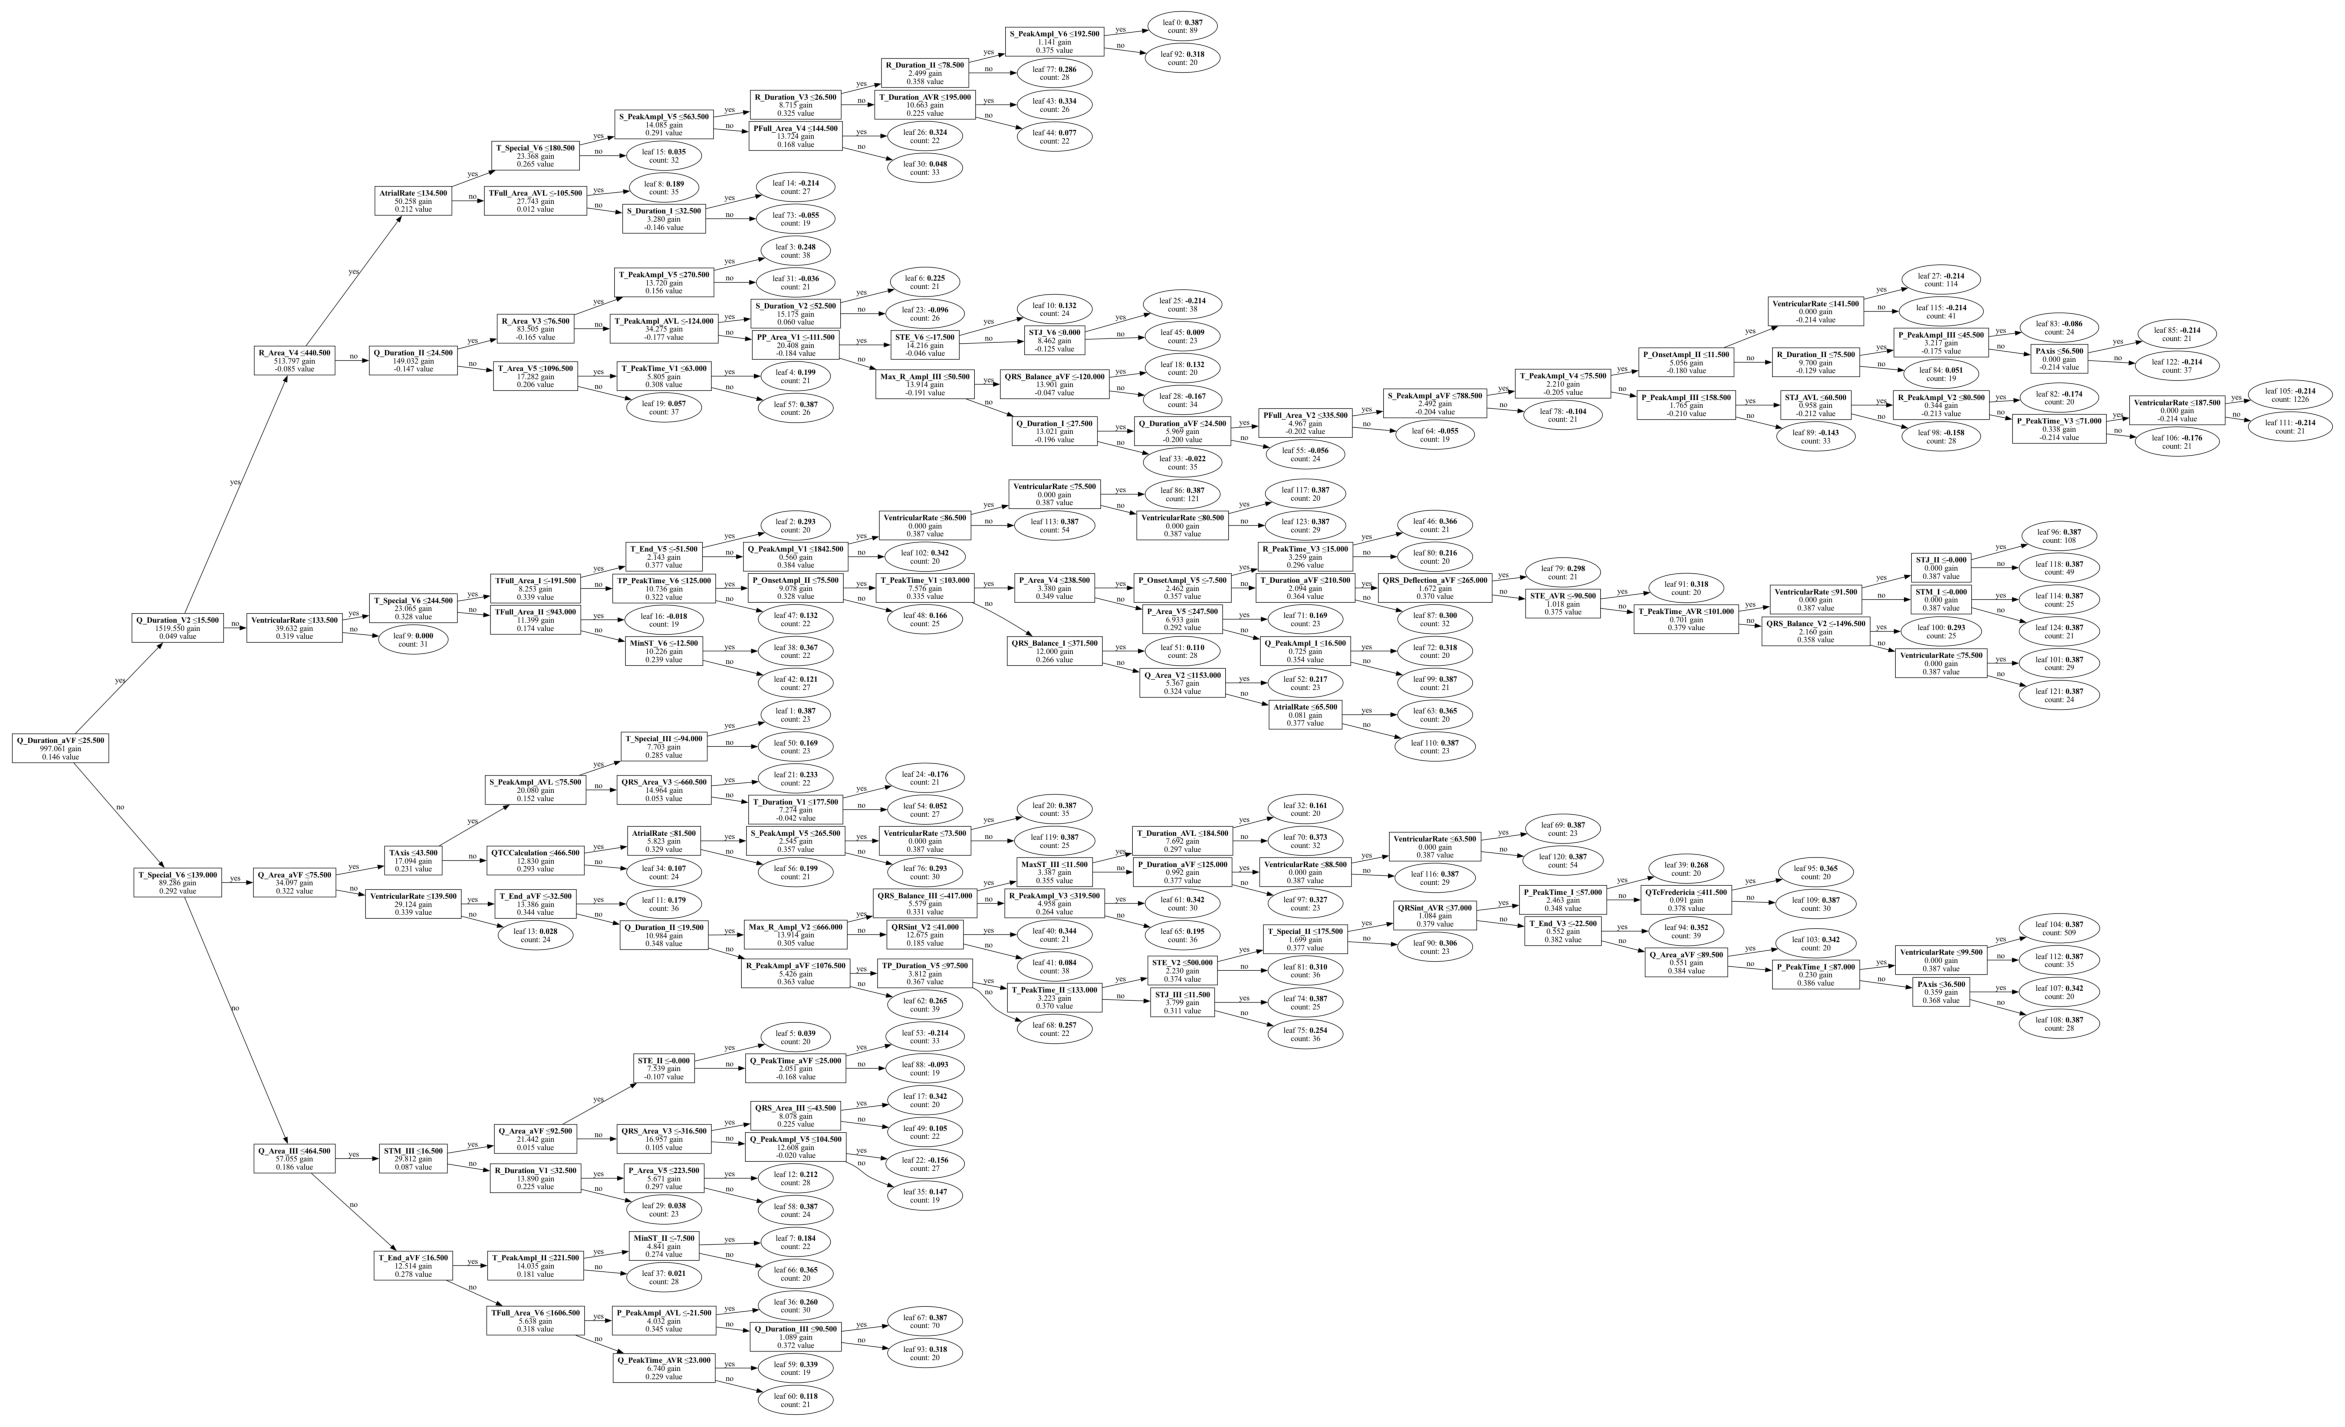

In [ ]:
# import false positive model
falpos_model = lgb.Booster(model_file='falpos.pkl')

# visualize
plt.figure(figsize=(30, 20))
ax = lgb.plot_tree(falpos_model, 
                   tree_index=0, 
                   figsize=(30, 20), 
                   show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.show()

<Figure size 3000x2000 with 0 Axes>

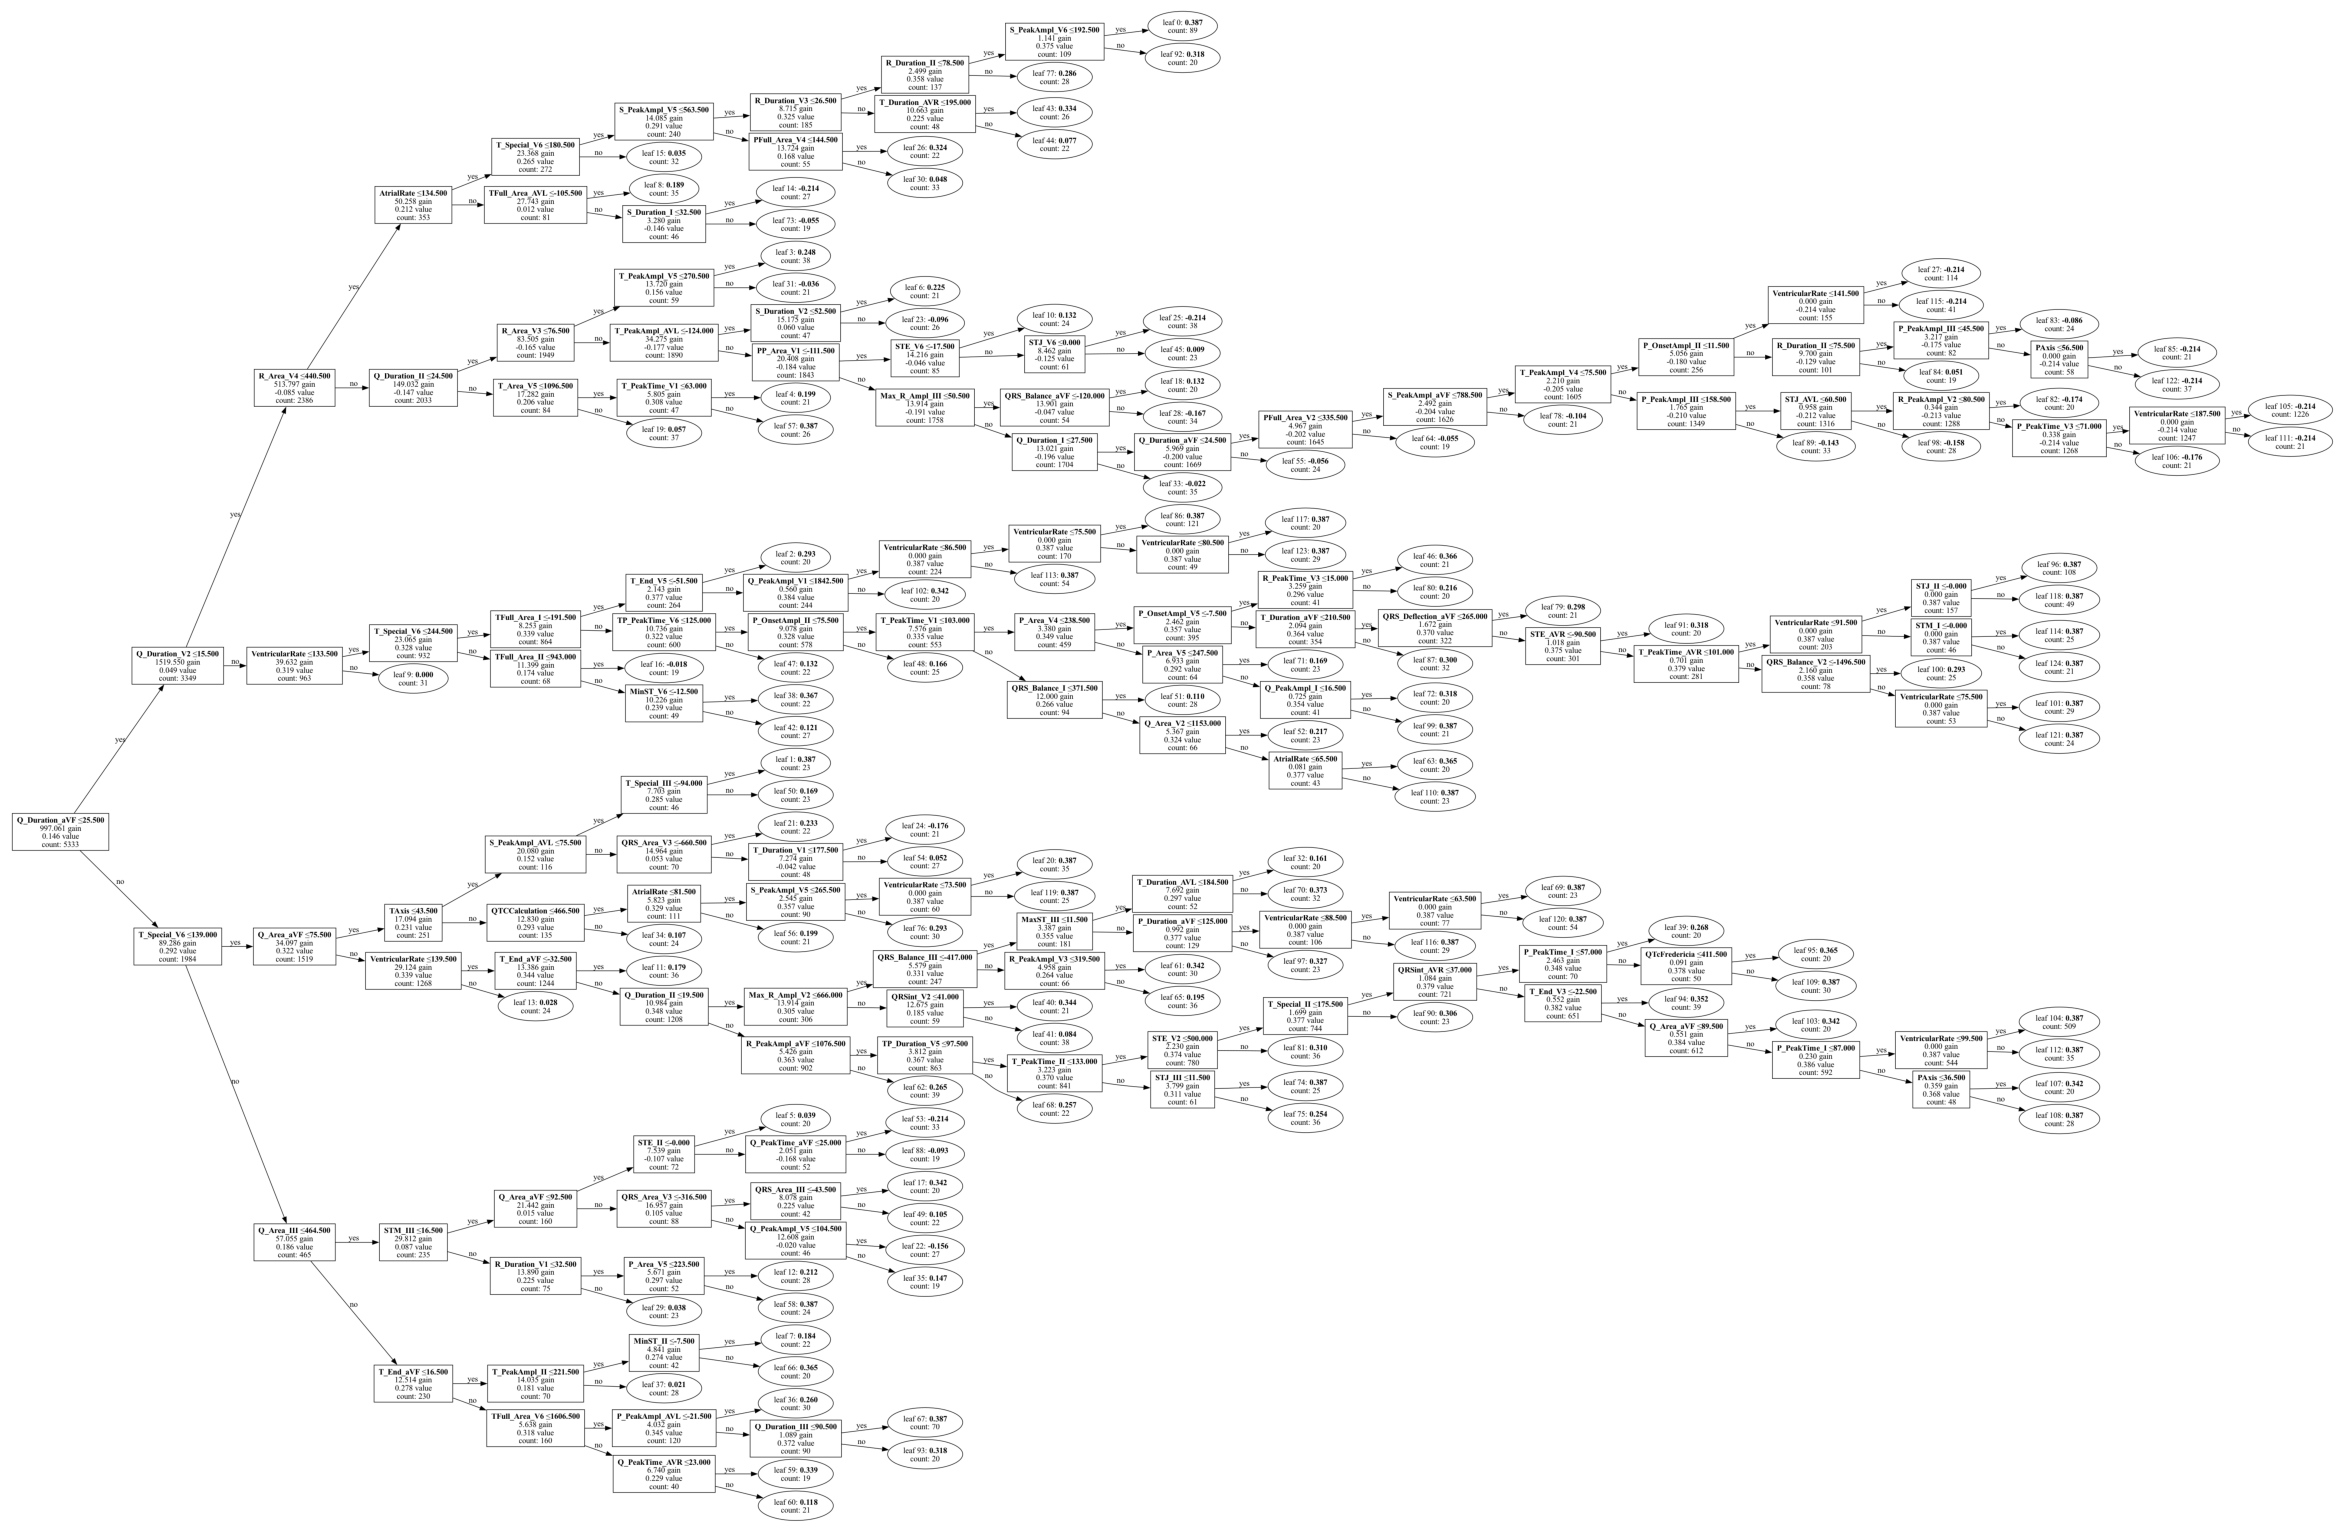

In [ ]:
# import false positive model
falpos_model = lgb.Booster(model_file='falpos.pkl')

# visualize
plt.figure(figsize=(30, 20))
ax = lgb.plot_tree(falpos_model, 
                   tree_index=0, 
                   figsize=(30, 20), 
                   show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count', 'leaf_value'])
plt.show()

<Figure size 3000x2000 with 0 Axes>

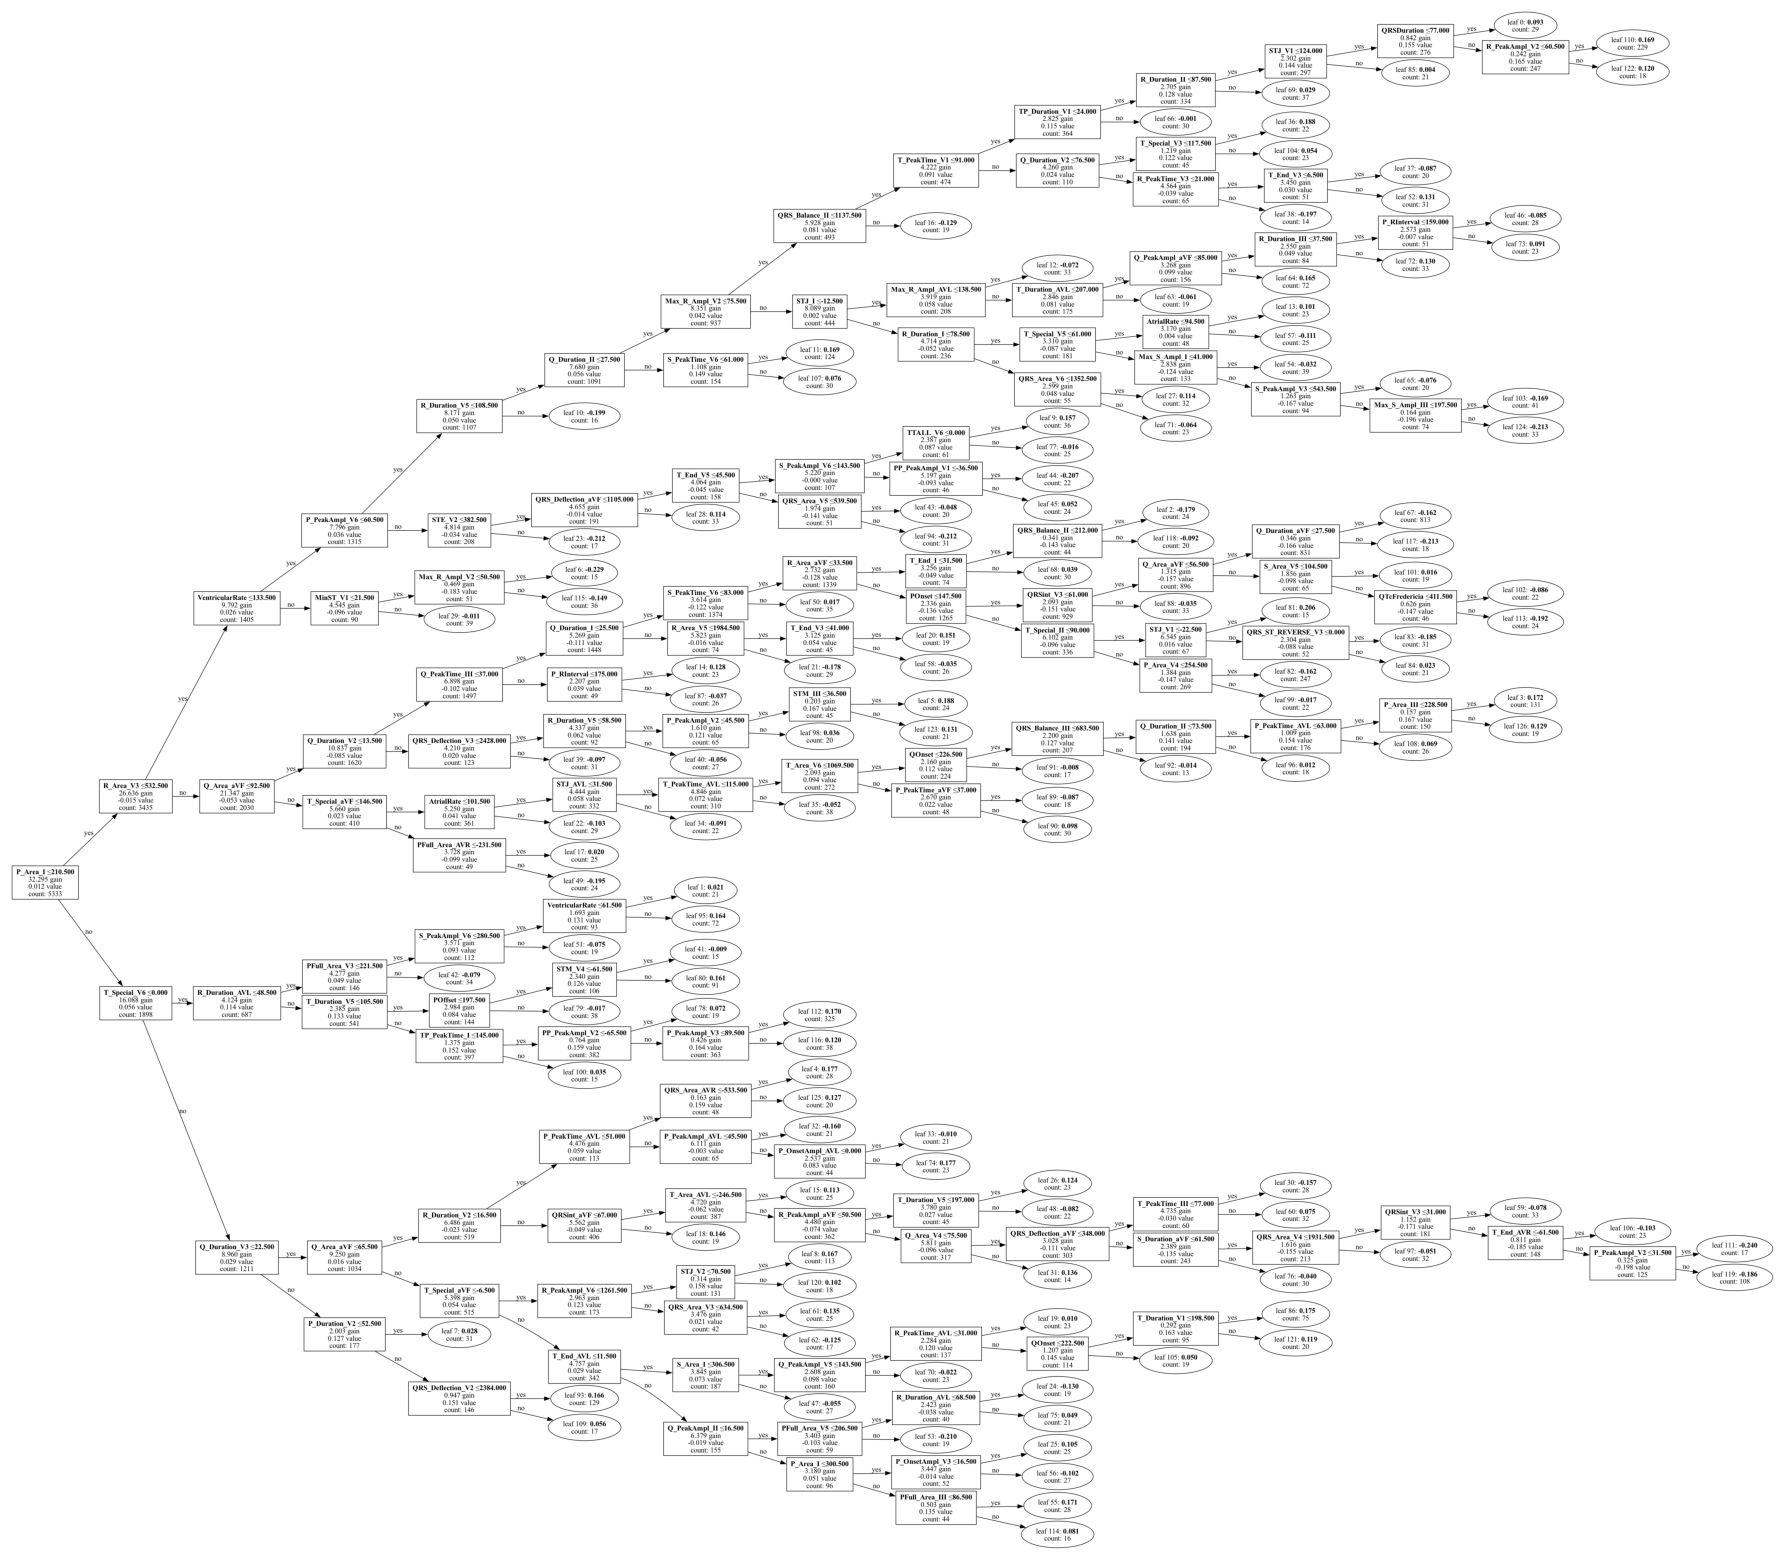

In [ ]:
# import false positive model
falpos_model = lgb.Booster(model_file='falpos.pkl')

# visualize
plt.figure(figsize=(30, 20))
ax = lgb.plot_tree(falpos_model, 
                   tree_index=15, 
                   figsize=(30, 20), 
                   show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count', 'leaf_value'])
plt.show()

In [ ]:
from dtreeviz import model

# visualize with dtreeviz
viz_model = model(
    falpos_model,
    X_train=X_train,
    y_train=y_train,
    feature_names=X.columns,
    target_name="MI",
    tree_index=0  
)

viz_model.view()

# Visualize ensemble method